#### Information on how data in the `002_MI_school_poverty.ipynb` notebook was generated

---

1. Read in `school_data_mi.txt` file from https://www.census.gov/data/datasets/2021/demo/saipe/2021-school-districts.html.
2. Convert the school data into a Pandas DataFrame and create new variables for the percentage of students in poverty compared to the student population and total population in school district.
3. Plot scatter plots using `matplotlib` to view outliers in population and poverty percentages.

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mylines = []                             
with open ("school_data_mi.txt", 'rt') as myfile: 
    for myline in myfile:                
        mylines.append(myline)           

school_data = []
for i in range(len(mylines)):
    school_data.append(mylines[i][83:109])

    #school_data

In [3]:
def string_to_int_list(s):
    # Split the string into a list of individual strings
    string_list = s.split()

    # Convert each string in the list to an integer
    int_list = [int(string) for string in string_list]

    # Return the list of integers
    return int_list

In [4]:
mylines
districts = []
district_code = []
for i in range(len(mylines)):
    districts.append(mylines[i][9:50])
    district_code.append(mylines[i][3:8])

In [5]:
new = []
for i in school_data:
    new.append(string_to_int_list(i))

population = []
students = []
poverty = []
for i in new:
    population.append(i[0])
    students.append(i[1])
    poverty.append(i[2])

school_poverty = pd.DataFrame({'District Code': district_code,'District': districts,'Population': population, 'Students': students,'Poverty': poverty})
school_poverty["% Within Students"] = school_poverty["Poverty"]/school_poverty["Students"]
school_poverty["% Within Population"] = school_poverty["Poverty"]/school_poverty["Population"]

school_poverty

,District Code,District,Population,Students,Poverty,% Within Students,% Within Population
0,01890,Adams Township School District,2810,590,55,0.093220,0.019573
1,01920,Addison Community Schools,7831,1155,155,0.134199,0.019793
2,01950,Adrian City School District,29238,4467,778,0.174166,0.026609
3,01980,Airport Community School District,20903,3556,546,0.153543,0.026121
4,02010,Akron-Fairgrove Schools,2864,417,71,0.170264,0.024791
...,...,...,...,...,...,...,...
536,36540,Wyandotte City School District,24796,3458,448,0.129555,0.018067
537,36570,Wyoming Public Schools,36182,5631,784,0.139229,0.021668
538,36600,Yale Public Schools,10893,1871,243,0.129877,0.022308
539,36630,Ypsilanti Community Schools,60405,7837,2186,0.278933,0.036189


In [6]:
school_poverty[school_poverty["% Within Students"] == max(school_poverty["% Within Students"])]

,District Code,District,Population,Students,Poverty,% Within Students,% Within Population
443,30390,Saginaw City School District,52754,9709,4864,0.500978,0.092202


In [7]:
school_poverty[school_poverty["Population"] == max(school_poverty["Population"])]

,District Code,District,Population,Students,Poverty,% Within Students,% Within Population
144,01103,Detroit Public Schools Community District,632522,116285,46730,0.401858,0.073879


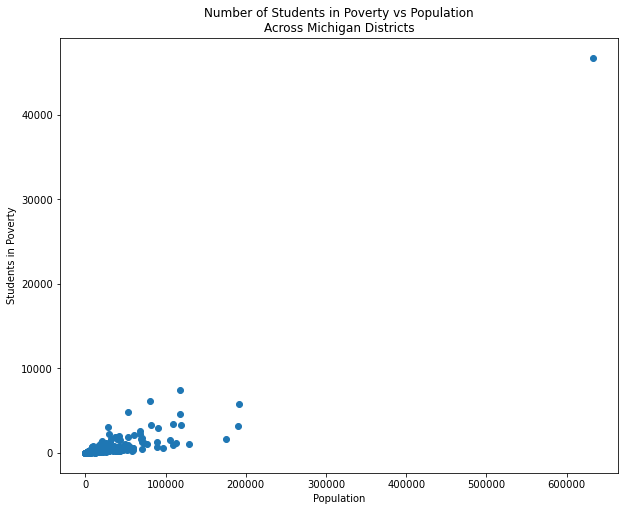

In [8]:
plt.figure(figsize=[10,8])
plt.scatter(school_poverty['Population'], school_poverty['Poverty'])
plt.xlabel('Population')
plt.ylabel('Students in Poverty')
plt.title('Number of Students in Poverty vs Population\nAcross Michigan Districts')
plt.show()

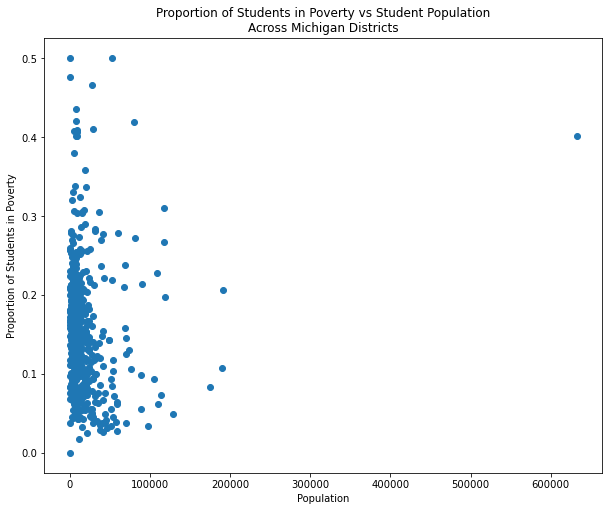

In [9]:
plt.figure(figsize=[10,8])
plt.scatter(school_poverty['Population'],school_poverty['% Within Students'])
plt.title('Proportion of Students in Poverty vs Student Population\nAcross Michigan Districts')
plt.xlabel('Population')
plt.ylabel('Proportion of Students in Poverty')
plt.show()

In [10]:
school_poverty[school_poverty["% Within Students"] > 0.4]

,District Code,District,Population,Students,Poverty,% Within Students,% Within Population
27,03810,Baldwin Community Schools,9046,927,372,0.401294,0.041123
41,04500,Beecher Community School District,8402,1685,735,0.436202,0.087479
47,04830,Benton Harbor Area Schools,28958,5418,2224,0.410484,0.076801
62,06300,Bois Blanc Pines School District,101,2,1,0.500000,0.009901
91,08070,Carrollton School District,5734,889,363,0.408324,0.063307
144,01103,Detroit Public Schools Community District,632522,116285,46730,0.401858,0.073879
160,12930,Ecorse Public School District,8572,1665,669,0.401802,0.078045
180,14520,Flint City School District,80792,14569,6111,0.419452,0.075639
223,17520,Hamtramck Public Schools,28136,6523,3040,0.466043,0.108047
239,18330,Highland Park City Schools,8883,1394,571,0.409613,0.064280
